# FutureCart: AI-Driven Demand Prediction for Smarter Retail.

## Time Series Analysis

Time series can be think as an ordered sequence of values of a variable at equally spaced time intervals.

Time series analysis involves studying patterns, trends and dependencies in the data points to make predictions, understand underlying processes and make informed decisions.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [2]:
df1=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\ProductA.xlsx')
df2=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\ProductA_google_clicks.xlsx')
df3=pd.read_excel(r'C:\Users\abhig\Documents\Springboard\FutureCart\ProductA_fb_impressions.xlsx')

new_df1=pd.merge(df1, df2, on='Day Index', how='left')

df=pd.merge(new_df1, df3, on='Day Index', how='left')# datset combining all 3 datasets

df is the master data.

In [3]:
df.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


In [4]:
df.shape

(212, 4)

Here the dataset conatins 212 rows and 4 columns

In [5]:
df.dtypes

Day Index      datetime64[ns]
Quantity                int64
Clicks                  int64
Impressions             int64
dtype: object

In [6]:
df.describe()

,Day Index,Quantity,Clicks,Impressions
count,212,212.000000,212.00000,212.000000
mean,2022-03-16 12:00:00,17.542453,358.20283,1531.702830
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000
75%,2022-05-08 06:00:00,21.000000,492.75000,1862.000000
max,2022-06-30 00:00:00,38.000000,726.00000,2707.000000
std,NaN,5.790423,164.52160,440.660783


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


## Check Null Values

In [8]:
df.isnull().sum()

Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64

Here , we don't have any null values in the dataset

Lets check it using heatmap.

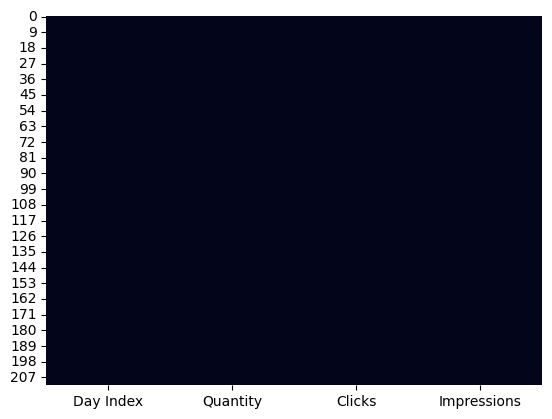

<Figure size 1200x600 with 0 Axes>

In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.figure(figsize=(12, 6))
plt.show() # The below figure indicates that there are no null values in the dataset

There are no null values in our dataset.

In [10]:
df.dtypes

Day Index      datetime64[ns]
Quantity                int64
Clicks                  int64
Impressions             int64
dtype: object

Here , we don't have any column of object datatype. So there won't be any garbage values.

## Plotting for understanding the distribution

Lets try to plot a histogram of the dataset and see how it is distributed

Lets consider "Quantity" column.

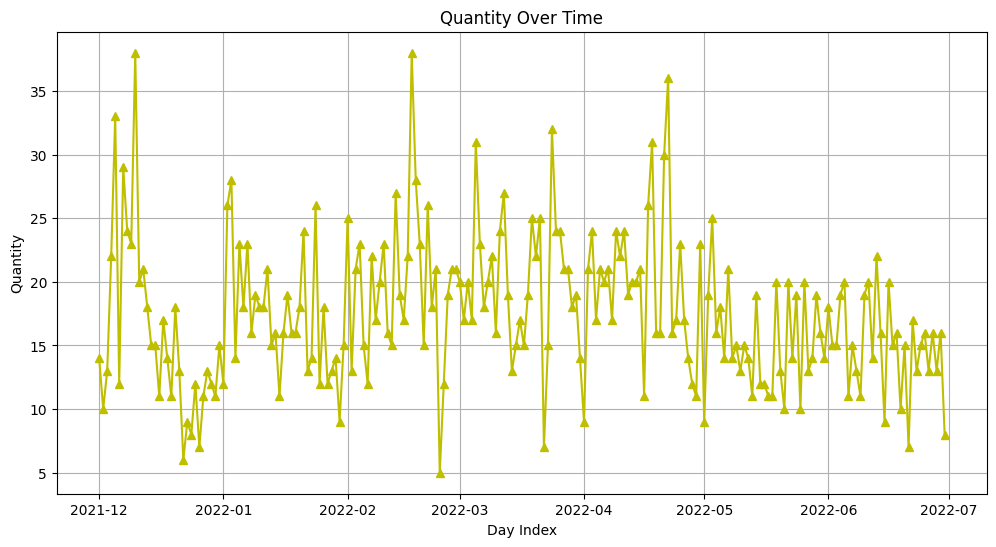

In [11]:
df['Day Index'] = pd.to_datetime(df['Day Index']) #converting into datetimeformat

plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='^', linestyle='-', color='y')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.title('Quantity Over Time')
plt.grid(True)
plt.show()

You can see that, at mid-december, there is a huge growth in quantity but it dropped to the bottom at the end of the month. This happened again in the cases of February and April.

Lets try to look at it on weekly-basis.

In [12]:
df.set_index('Day Index', inplace=True) # keeping Day Index as the index for resampling

df_weekly = df['Quantity'].resample('W').sum() # Resampling data to weekly and aggregating quantity

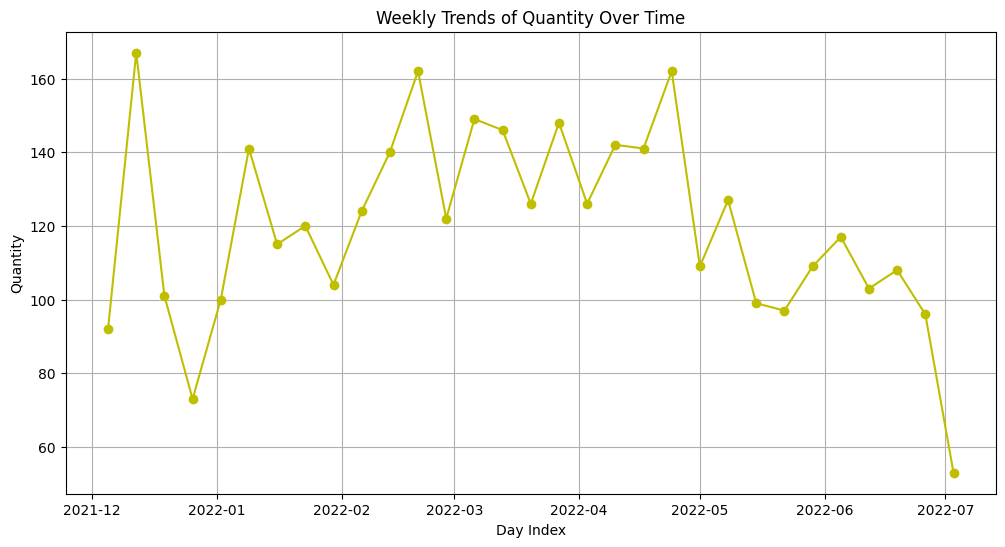

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values, marker='o', linestyle='-', color='y') # index-Day Index , values-Weekly distributed Quantity
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.title('Weekly Trends of Quantity Over Time')
plt.grid(True)
plt.show()

Lets do it for other columns as well.

In [14]:
df.columns

Index(['Quantity', 'Clicks', 'Impressions'], dtype='object')

In [15]:
df.reset_index(inplace=True) # Adding index back

In [16]:
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

In [17]:
df.set_index('Day Index', inplace=True) # keeping date as the index for resampling

df_weekly = df['Clicks'].resample('W').sum() # Resampling data to weekly and aggregating clicks

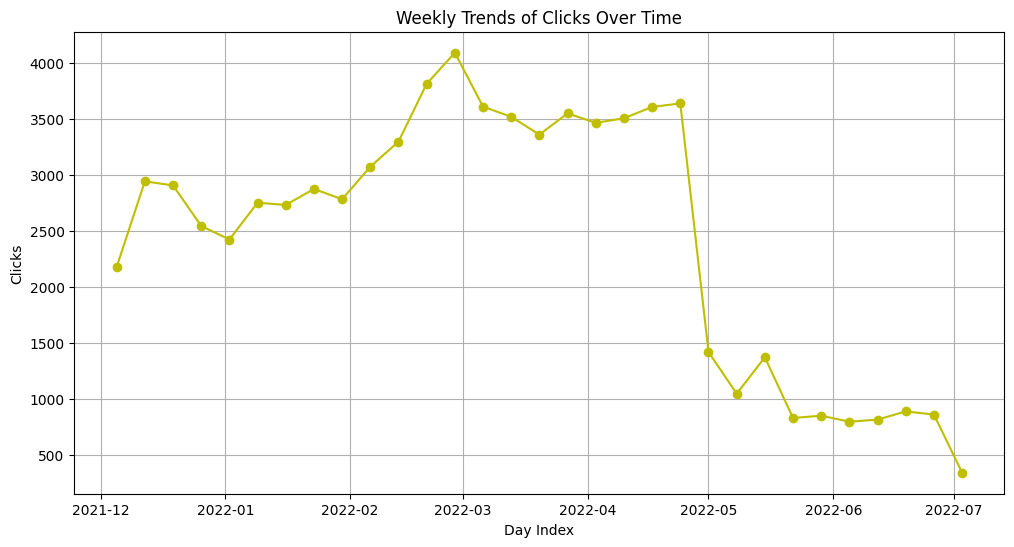

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values, marker='o', linestyle='-', color='y') # index-Day Index , values-Weekly distributed clicks
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.title('Weekly Trends of Clicks Over Time')
plt.grid(True)
plt.show()

You can see that there is huge down in number of clicks in the period of April-May.

In [19]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

In [20]:
df.set_index('Day Index', inplace=True) # keeping date as the index for resampling

df_weekly = df['Impressions'].resample('W').sum() # Resampling data to weekly and aggregating impressions

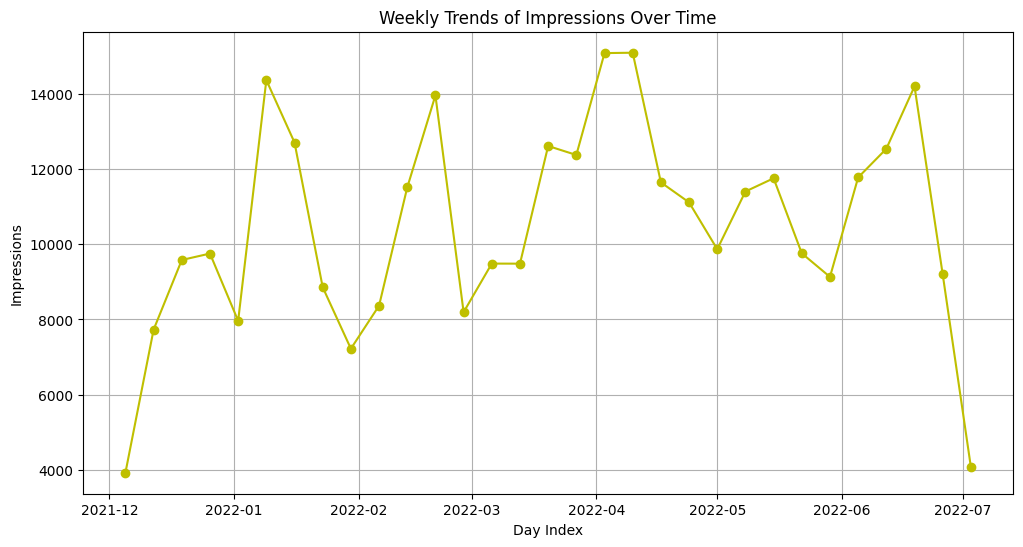

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly.values, marker='o', linestyle='-', color='y') # index-Day Index , values-Weekly distributed Impressions
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.title('Weekly Trends of Impressions Over Time')
plt.grid(True)
plt.show()

We can see that, after an increase in impressions , there is an immediate decrease as well. we may as well say that, there is more possibility in higher impressions at the start of the month than the end of the month. 

## Scatter-plot to understand the relationship

In [22]:
df.reset_index(inplace=True)

df.set_index('Day Index', inplace=True)
df_weekly = df.resample('W').sum() # Resample data to weekly frequency and aggregate using sum

Text(0, 0.5, 'Clicks')

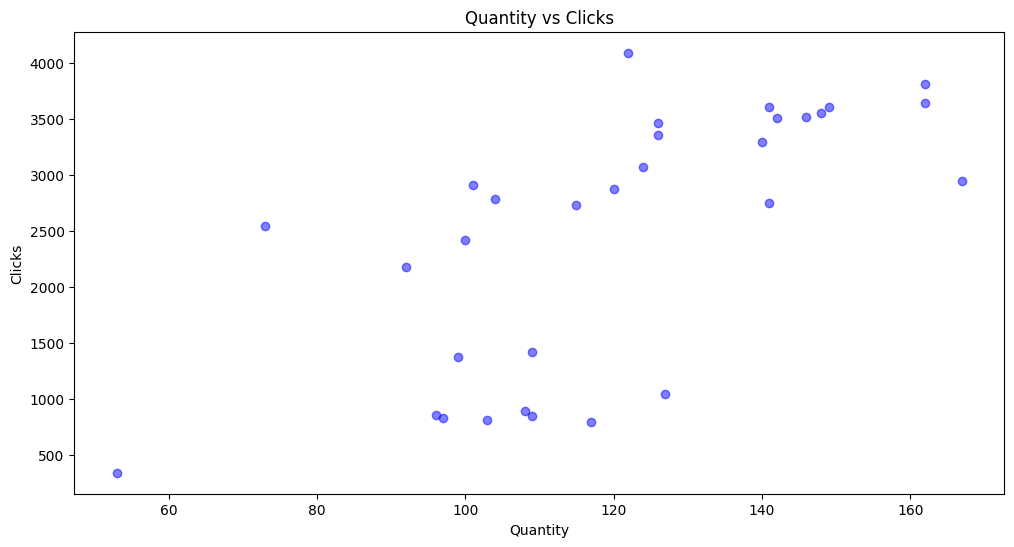

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(df_weekly['Quantity'], df_weekly['Clicks'], color='blue', alpha=0.5)
plt.title('Quantity vs Clicks')
plt.xlabel('Quantity')
plt.ylabel('Clicks')

Text(0, 0.5, 'Impressions')

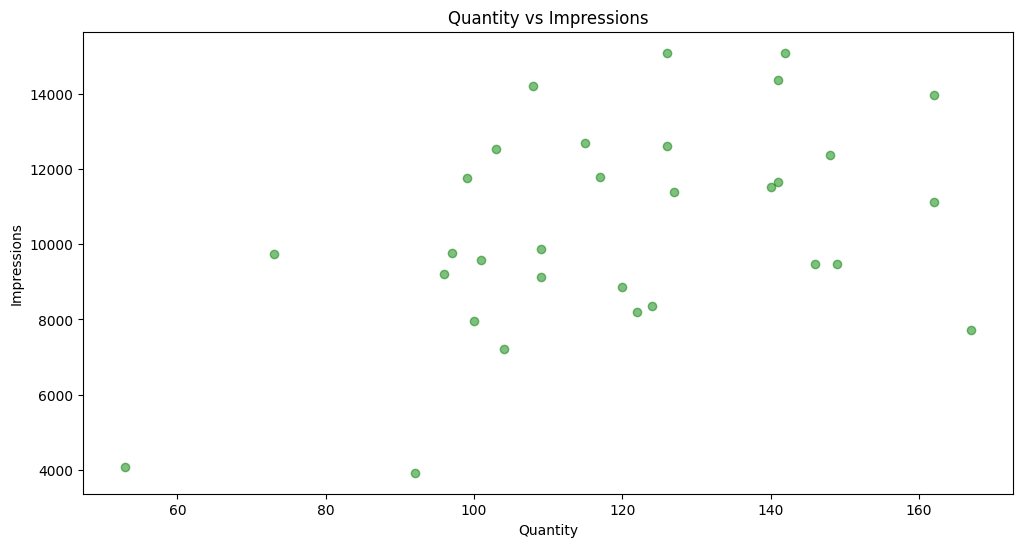

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(df_weekly['Quantity'], df_weekly['Impressions'], color='green', alpha=0.5)
plt.title('Quantity vs Impressions')
plt.xlabel('Quantity')
plt.ylabel('Impressions')

Text(0, 0.5, 'Impressions')

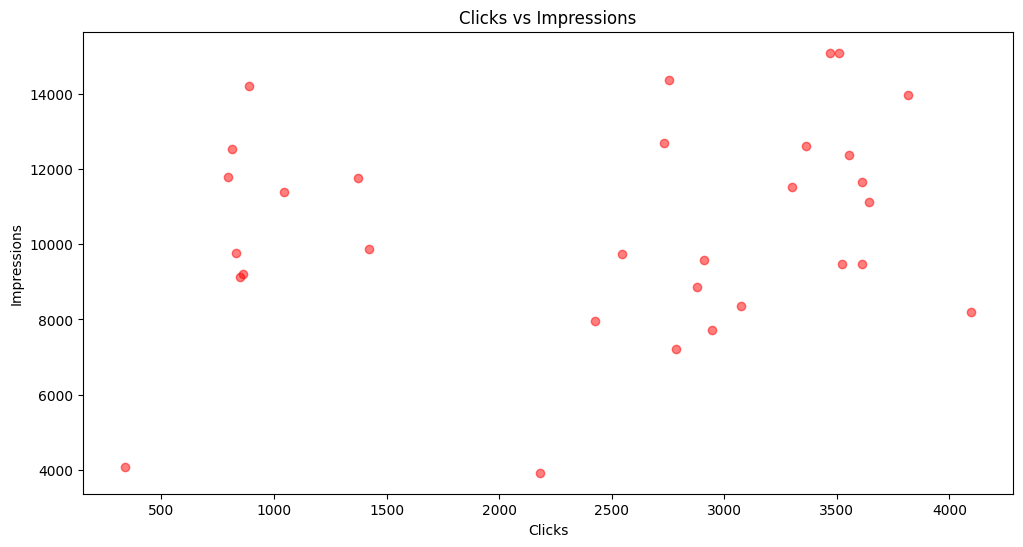

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(df_weekly['Clicks'], df_weekly['Impressions'], color='red', alpha=0.5)
plt.title('Clicks vs Impressions')
plt.xlabel('Clicks')
plt.ylabel('Impressions')

Lets interpret the relationships using correlation.

**Correlation Matrix:** A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

In [26]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

In [27]:
df['Day Index'] = pd.to_datetime(df['Day Index']) #converting into datetimeformat

df.set_index('Day Index', inplace=True)

# Resample data to weekly frequency and aggregate using sum
df_weekly = df.resample('W').sum()

# Check correlation between columns
correlation = df_weekly.corr()
print("Correlation matrix:\n", correlation)

Correlation matrix:
              Quantity    Clicks  Impressions
Quantity     1.000000  0.666932     0.460122
Clicks       0.666932  1.000000     0.200396
Impressions  0.460122  0.200396     1.000000


Lets plot the correlation matrix using heatmap

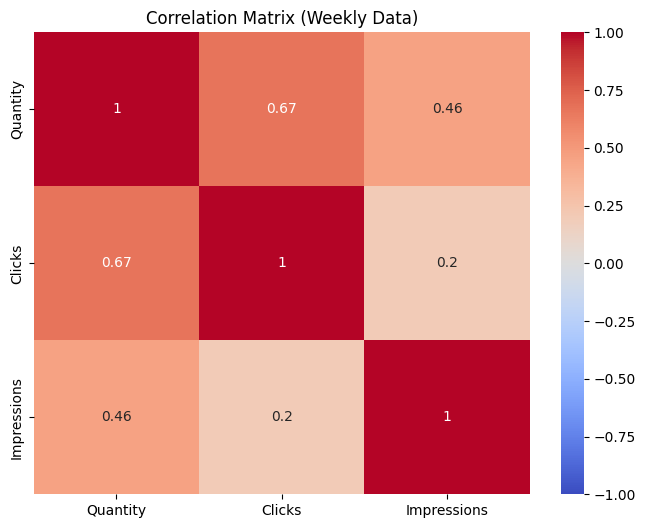

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Weekly Data)')
plt.show()

## Check Outliers

C:\Users\abhig\AppData\Local\Temp\ipykernel_11308\1215081002.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Quantity'], df['Clicks'], df['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])


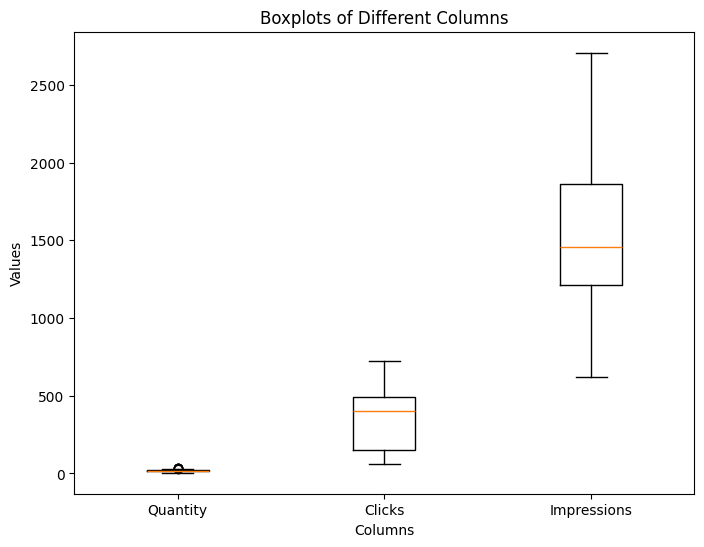

In [29]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['Quantity'], df['Clicks'], df['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])
plt.title("Boxplots of Different Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

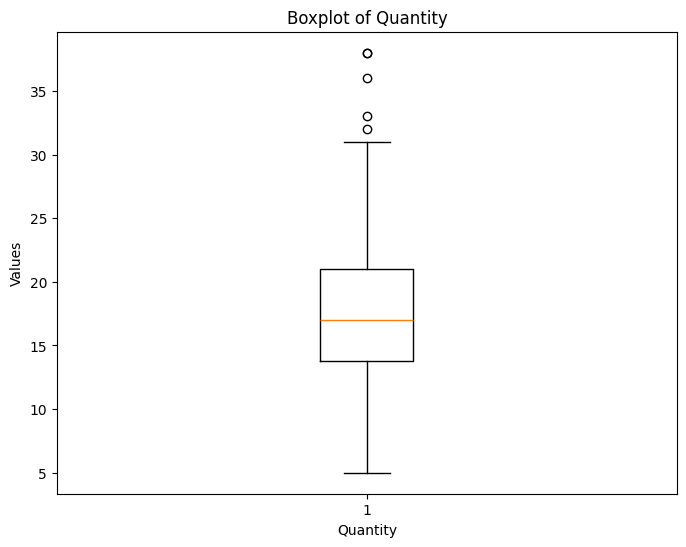

In [30]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Quantity'])
plt.title("Boxplot of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Values")
plt.show()

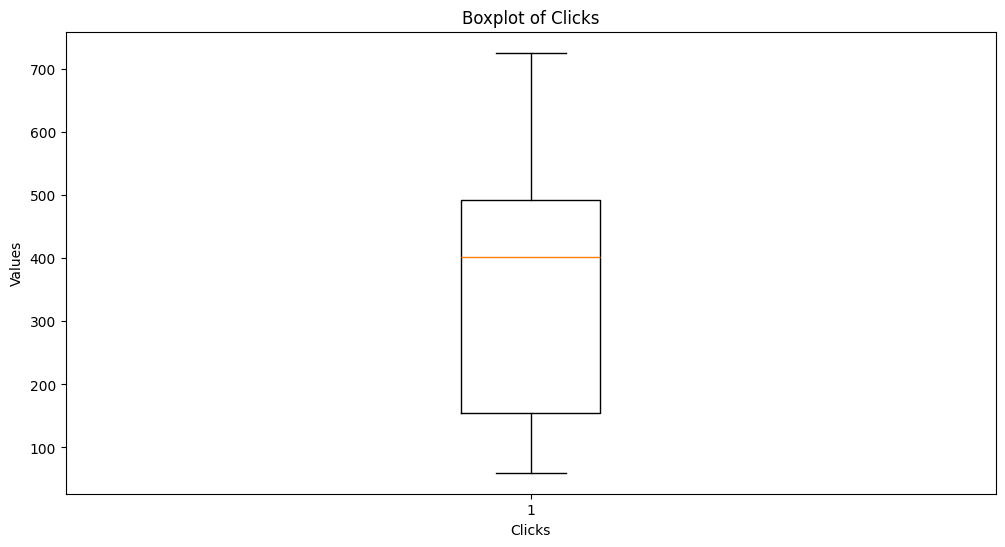

In [31]:
# Plot boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['Clicks'])
plt.title("Boxplot of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Values")
plt.show()

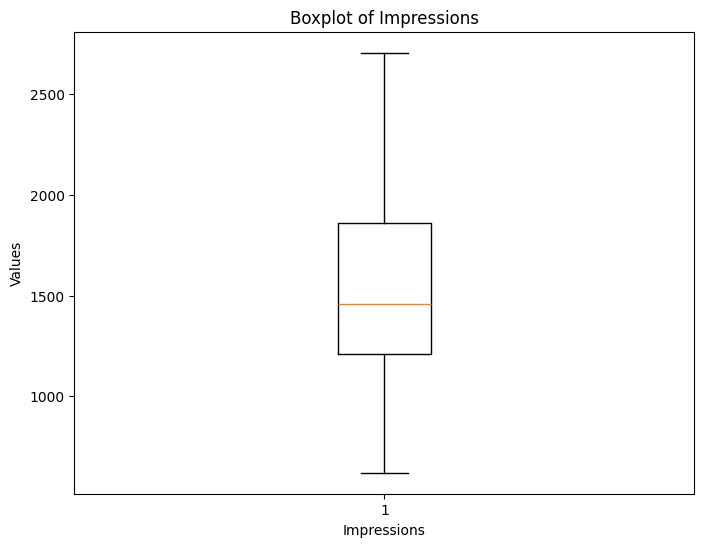

In [32]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Impressions'])
plt.title("Boxplot of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Values")
plt.show()

## Removing Outliers

We can do it using Inter-Quartile Range 

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print("Original DataFrame:")
print(df)
print("\nDataFrame after removing outliers:")
print(df_clean)

Original DataFrame:
            Quantity  Clicks  Impressions
Day Index                                
2021-12-01        14     445          620
2021-12-02        10     433          890
2021-12-03        13     424          851
2021-12-04        22     427          881
2021-12-05        33     451          678
...              ...     ...          ...
2022-06-26        13     114         1218
2022-06-27        16     106         1311
2022-06-28        13     109          885
2022-06-29        16      60         1000
2022-06-30         8      65          875

[212 rows x 3 columns]

DataFrame after removing outliers:
            Quantity  Clicks  Impressions
Day Index                                
2021-12-01        14     445          620
2021-12-02        10     433          890
2021-12-03        13     424          851
2021-12-04        22     427          881
2021-12-06        12     429          995
...              ...     ...          ...
2022-06-26        13     114         1

C:\Users\abhig\AppData\Local\Temp\ipykernel_11308\2256493066.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_clean['Quantity'], df_clean['Clicks'], df_clean['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])


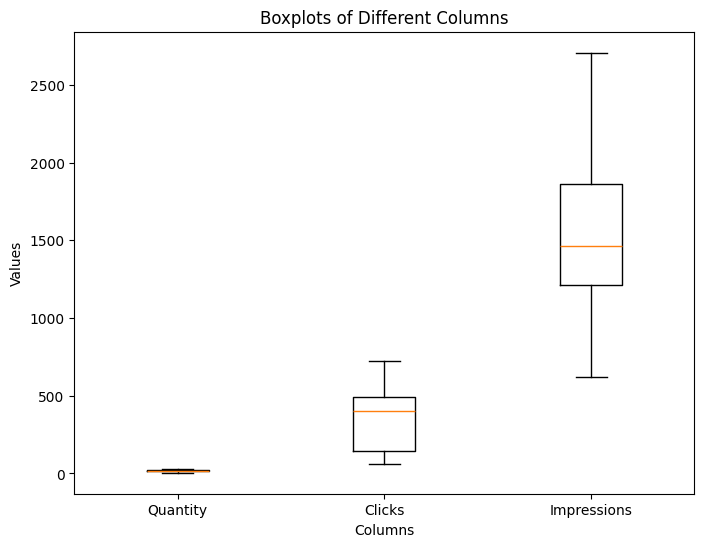

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot([df_clean['Quantity'], df_clean['Clicks'], df_clean['Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])
plt.title("Boxplots of Different Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

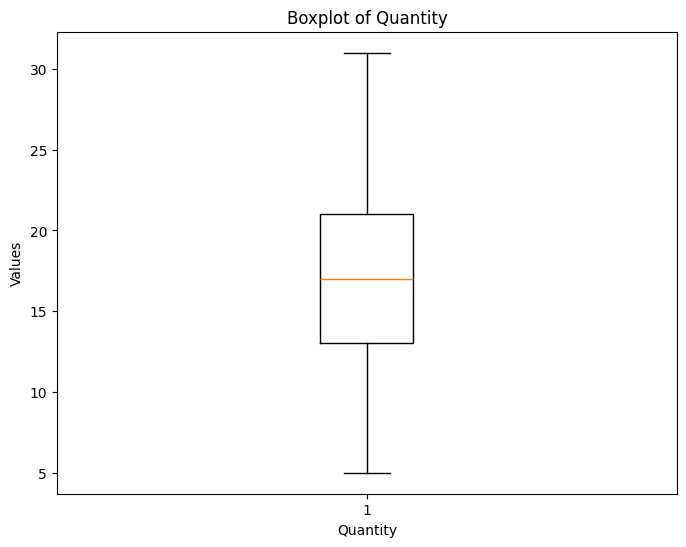

In [35]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['Quantity'])
plt.title("Boxplot of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Values")
plt.show()

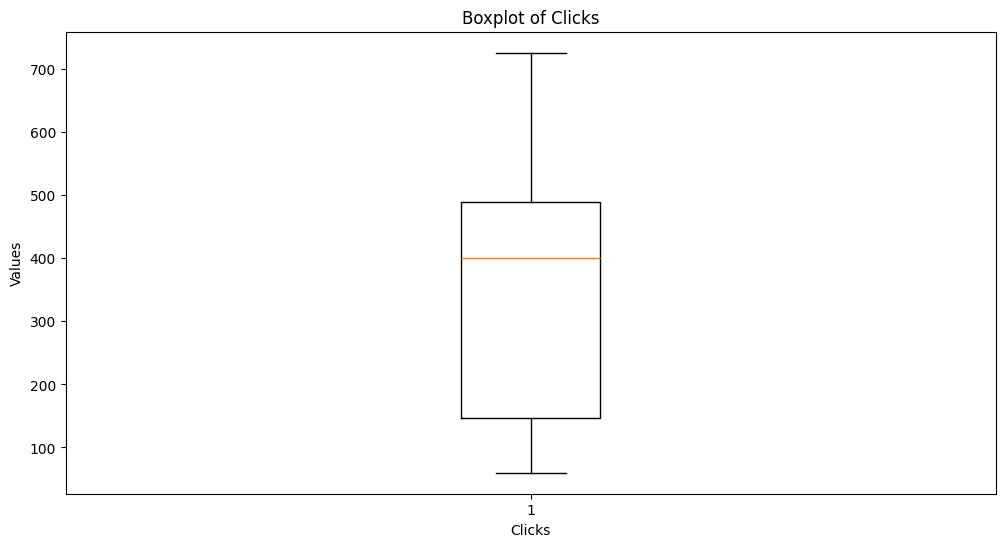

In [36]:
# Plot boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df_clean['Clicks'])
plt.title("Boxplot of Clicks")
plt.xlabel("Clicks")
plt.ylabel("Values")
plt.show()

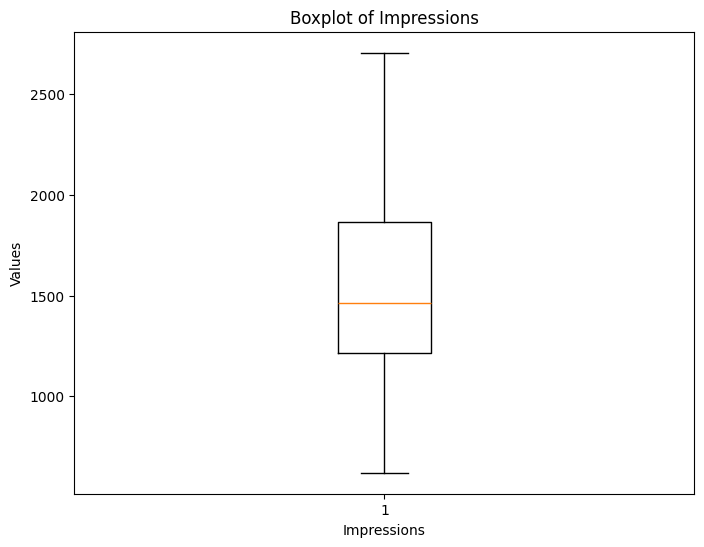

In [37]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['Impressions'])
plt.title("Boxplot of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Values")
plt.show()

## Feature Engineering

Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model. It involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model. The goal is to improve model accuracy by providing more meaningful and relevant information.

In [38]:
df=df_clean

In [39]:
df.head()

,Quantity,Clicks,Impressions
Day Index,,,
2021-12-01,14,445,620
2021-12-02,10,433,890
2021-12-03,13,424,851
2021-12-04,22,427,881
2021-12-06,12,429,995


In [40]:
df.loc[:, 'log_quantity'] = np.log1p(df['Quantity'])
df.loc[:, 'log_clicks'] = np.log1p(df['Clicks'])
df.loc[:, 'log_impressions'] = np.log1p(df['Impressions'])

In [41]:
df.head()

,Quantity,Clicks,Impressions,log_quantity,log_clicks,log_impressions
Day Index,,,,,,
2021-12-01,14,445,620,2.708050,6.100319,6.431331
2021-12-02,10,433,890,2.397895,6.073045,6.792344
2021-12-03,13,424,851,2.639057,6.052089,6.747587
2021-12-04,22,427,881,3.135494,6.059123,6.782192
2021-12-06,12,429,995,2.564949,6.063785,6.903747


In this way , lets try to add more columns to the dataset.

In [43]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'log_quantity',
       'log_clicks', 'log_impressions'],
      dtype='object')

In [44]:
df.loc[:, 'Day'] = df['Day Index'].dt.day_name()

The above code adds Day name to the dataset . Now , we can see that particular date is sunday or monday or which particular day it is.

In [45]:
df.loc[:, 'Day of Week'] = df['Day Index'].dt.dayofweek
df.loc[:, 'is_weekend'] = df['Day of Week'] >= 5
df.loc[:, 'Month'] = df['Day Index'].dt.month_name()
df.loc[:, 'Quarter'] = df['Day Index'].dt.quarter
df.loc[:, 'Year'] = df['Day Index'].dt.year
df.loc[:, 'Day of Month'] = df['Day Index'].dt.day
df.loc[:, 'Week of Year'] = df['Day Index'].dt.isocalendar().week

In [46]:
df.head()

,Day Index,Quantity,Clicks,Impressions,log_quantity,log_clicks,log_impressions,Day,Day of Week,is_weekend,Month,Quarter,Year,Day of Month,Week of Year
0,2021-12-01,14,445,620,2.708050,6.100319,6.431331,Wednesday,2,False,December,4,2021,1,48
1,2021-12-02,10,433,890,2.397895,6.073045,6.792344,Thursday,3,False,December,4,2021,2,48
2,2021-12-03,13,424,851,2.639057,6.052089,6.747587,Friday,4,False,December,4,2021,3,48
3,2021-12-04,22,427,881,3.135494,6.059123,6.782192,Saturday,5,True,December,4,2021,4,48
4,2021-12-06,12,429,995,2.564949,6.063785,6.903747,Monday,0,False,December,4,2021,6,49


So , the columns we added to the dataset are :
- The day of that particular date
- The day number according to the week
- If that particular date is a weekend or not
- The month to which the date belongs to
- The quarter to which the date belongs to
- Year of the date
- The day number according to the month
- The week number according to the year

## Some Basic plots after removing oultiers and adding additional columns

In [47]:
df.set_index('Day Index', inplace=True)
df_weekly = df.resample('W').sum() # Resample data to weekly frequency and aggregate using sum

Text(0, 0.5, 'Clicks')

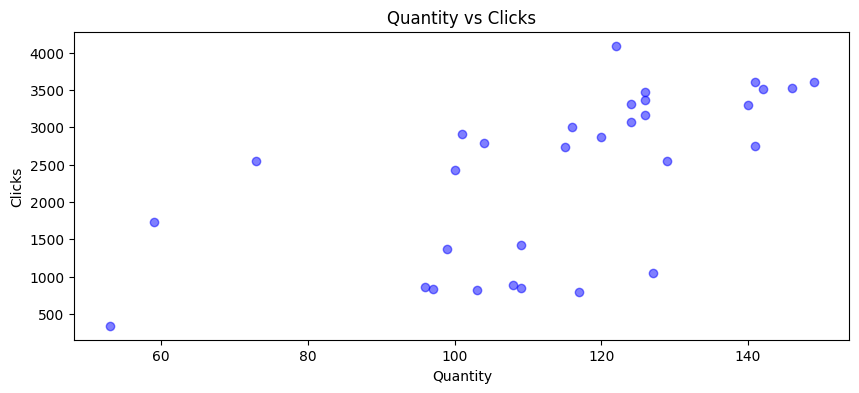

In [48]:
plt.figure(figsize=(10,4))
plt.scatter(df_weekly['Quantity'], df_weekly['Clicks'], color='blue', alpha=0.5)
plt.title('Quantity vs Clicks')
plt.xlabel('Quantity')
plt.ylabel('Clicks')

Text(0, 0.5, 'Impressions')

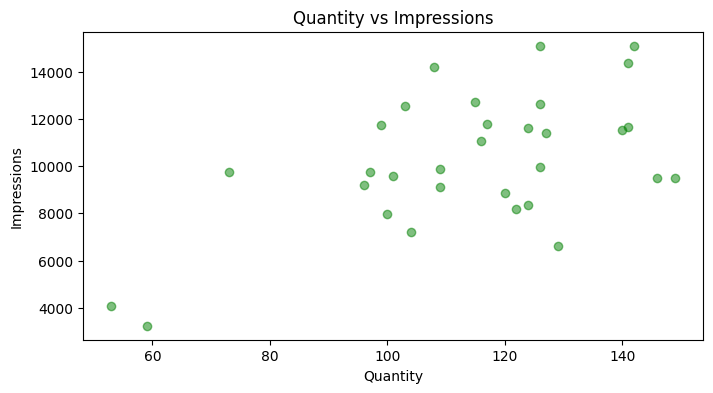

In [49]:
plt.figure(figsize=(8,4))
plt.scatter(df_weekly['Quantity'], df_weekly['Impressions'], color='green', alpha=0.5)
plt.title('Quantity vs Impressions')
plt.xlabel('Quantity')
plt.ylabel('Impressions')

Text(0, 0.5, 'Impressions')

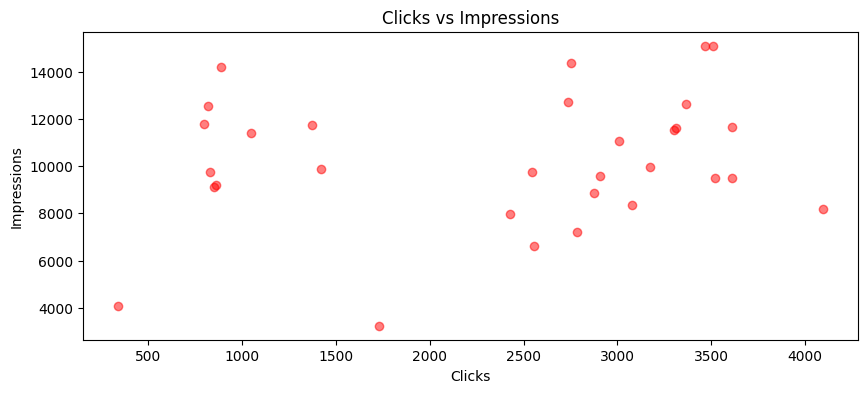

In [50]:
plt.figure(figsize=(10,4))
plt.scatter(df_weekly['Clicks'], df_weekly['Impressions'], color='red', alpha=0.5)
plt.title('Clicks vs Impressions')
plt.xlabel('Clicks')
plt.ylabel('Impressions')

In [51]:
df.reset_index(inplace=True) # Adding index back
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'log_quantity',
       'log_clicks', 'log_impressions', 'Day', 'Day of Week', 'is_weekend',
       'Month', 'Quarter', 'Year', 'Day of Month', 'Week of Year'],
      dtype='object')

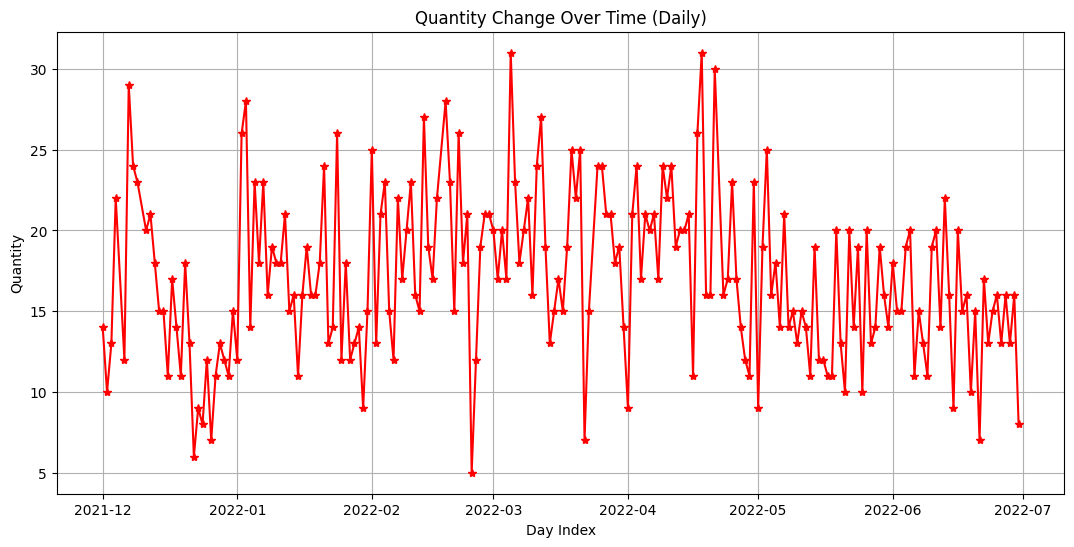

In [52]:
plt.figure(figsize=(13, 6))
plt.plot(df['Day Index'], df['Quantity'], marker='*', linestyle='-', color='r')
plt.title('Quantity Change Over Time (Daily)')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

The plot is a representation of how Quantity changes over time on daily basis. 

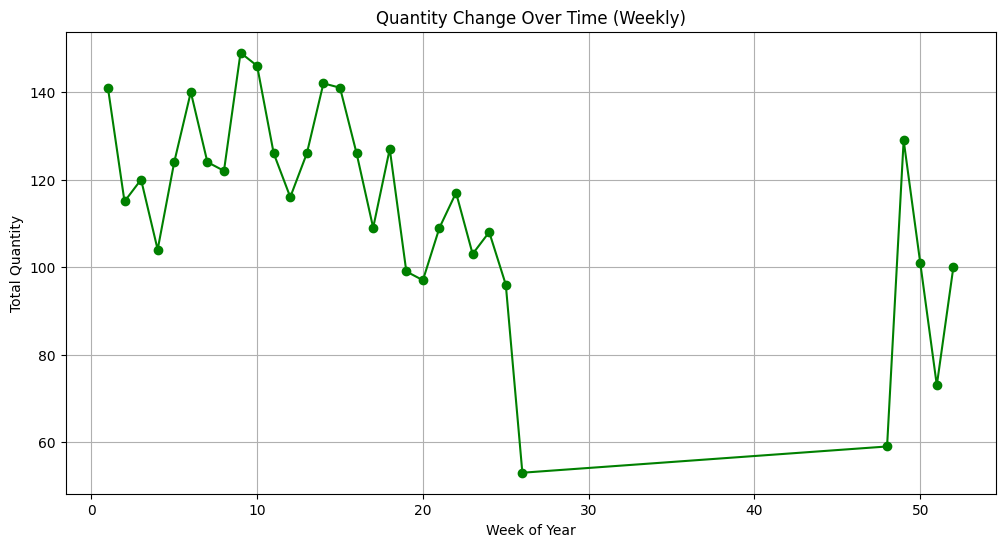

In [54]:
# Group by 'week of year' and calculate the sum or average of 'Quantity'
weekly_quantity = df.groupby('Week of Year')['Quantity'].sum()

# Line plot for weekly change in Quantity
plt.figure(figsize=(12, 6))
plt.plot(weekly_quantity.index, weekly_quantity, marker='o', linestyle='-', color='g')
plt.title('Quantity Change Over Time (Weekly)')
plt.xlabel('Week of Year')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

The plot is a representation of how Quantity changes over time on weekly basis. 

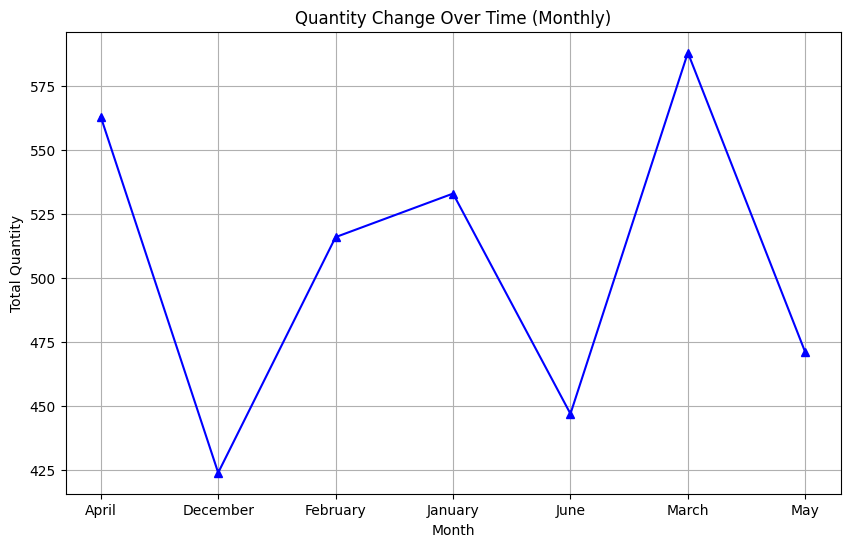

In [53]:
# Group by 'month' and calculate the sum or average of 'Quantity'
monthly_quantity = df.groupby('Month')['Quantity'].sum()

# Line plot for monthly change in Quantity
plt.figure(figsize=(10, 6))
plt.plot(monthly_quantity.index, monthly_quantity, marker='^', linestyle='-', color='b')
plt.title('Quantity Change Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

The plot is a representation of how Quantity changes over time on monthly basis. 

C:\Users\abhig\AppData\Local\Temp\ipykernel_11308\3520032583.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day', y='Quantity', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\abhig\AppData\Local\Temp\ipykernel_11308\3520032583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Quantity', data=df, estimator='mean', ci=None, palette='viridis')


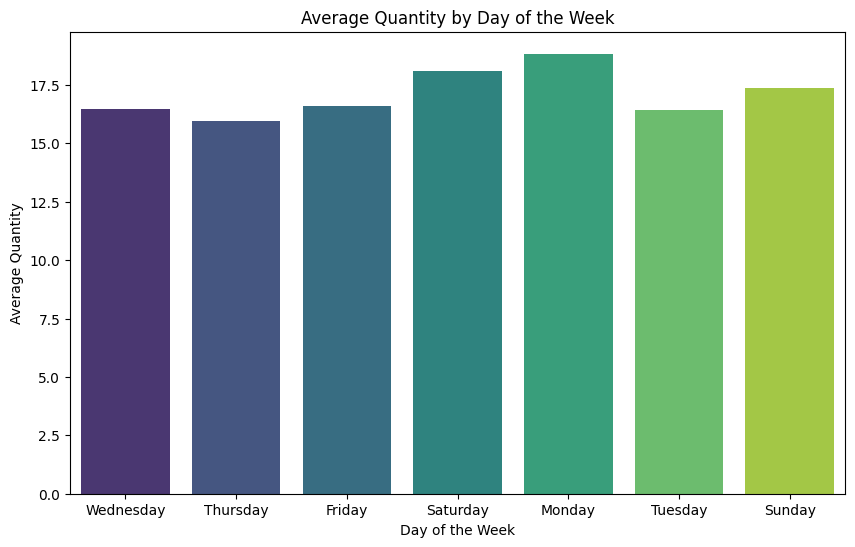

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Quantity', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Quantity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Quantity')
plt.show()

C:\Users\abhig\AppData\Local\Temp\ipykernel_5548\3572884264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day', y='Clicks', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\abhig\AppData\Local\Temp\ipykernel_5548\3572884264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Clicks', data=df, estimator='mean', ci=None, palette='viridis')


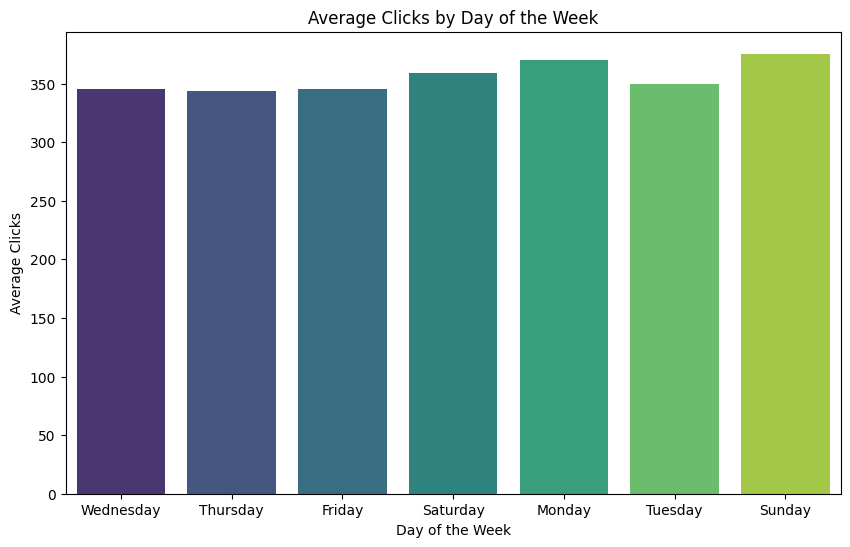

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Clicks', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Clicks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Clicks')
plt.show()

C:\Users\abhig\AppData\Local\Temp\ipykernel_11308\2580512211.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day', y='Impressions', data=df, estimator='mean', ci=None, palette='viridis')
C:\Users\abhig\AppData\Local\Temp\ipykernel_11308\2580512211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Impressions', data=df, estimator='mean', ci=None, palette='viridis')


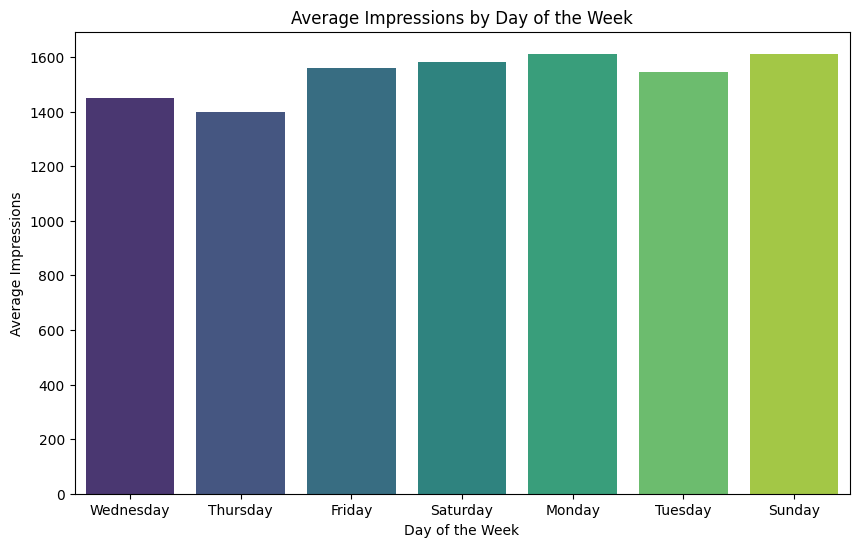

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Impressions', data=df, estimator='mean', ci=None, palette='viridis')
plt.title('Average Impressions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Impressions')
plt.show()

C:\Users\abhig\AppData\Local\Temp\ipykernel_5548\815498009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_weekend', data=df, palette='Set2')


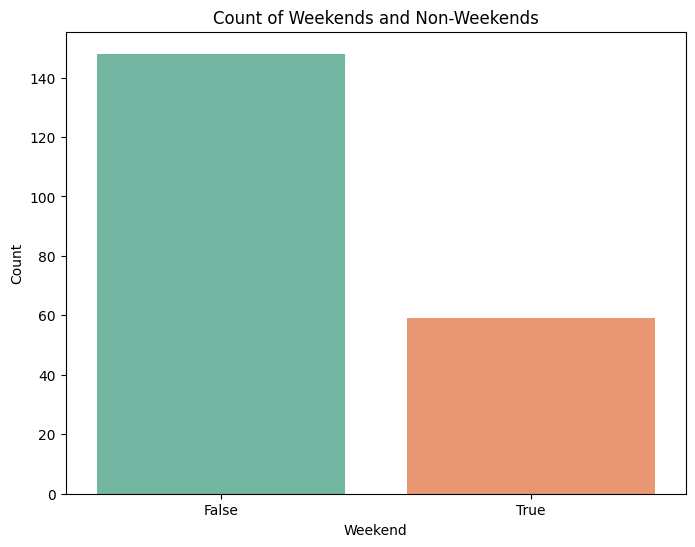

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_weekend', data=df, palette='Set2')
plt.title('Count of Weekends and Non-Weekends')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()


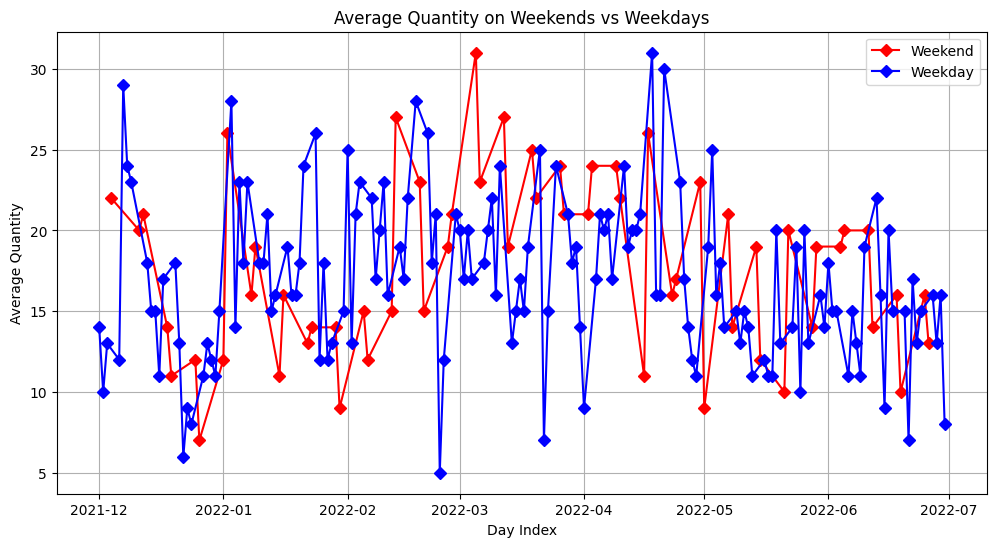

In [57]:
weekend_data = df[df['is_weekend'] == 1].groupby('Day Index')['Quantity'].mean()
weekday_data = df[df['is_weekend'] == 0].groupby('Day Index')['Quantity'].mean()

plt.figure(figsize=(12, 6))
plt.plot(weekend_data.index, weekend_data.values, label='Weekend', color='red', marker='D')
plt.plot(weekday_data.index, weekday_data.values, label='Weekday', color='blue', marker='D')
plt.title('Average Quantity on Weekends vs Weekdays')
plt.xlabel('Day Index')
plt.ylabel('Average Quantity')
plt.legend()
plt.grid(True)
plt.show()

This plot provides insights into how quantities differ on weekends and weekdays. It’s useful for spotting patterns that might be tied to time-based factors or other seasonal trends.Lets try to smoothen the data for clear visulization.

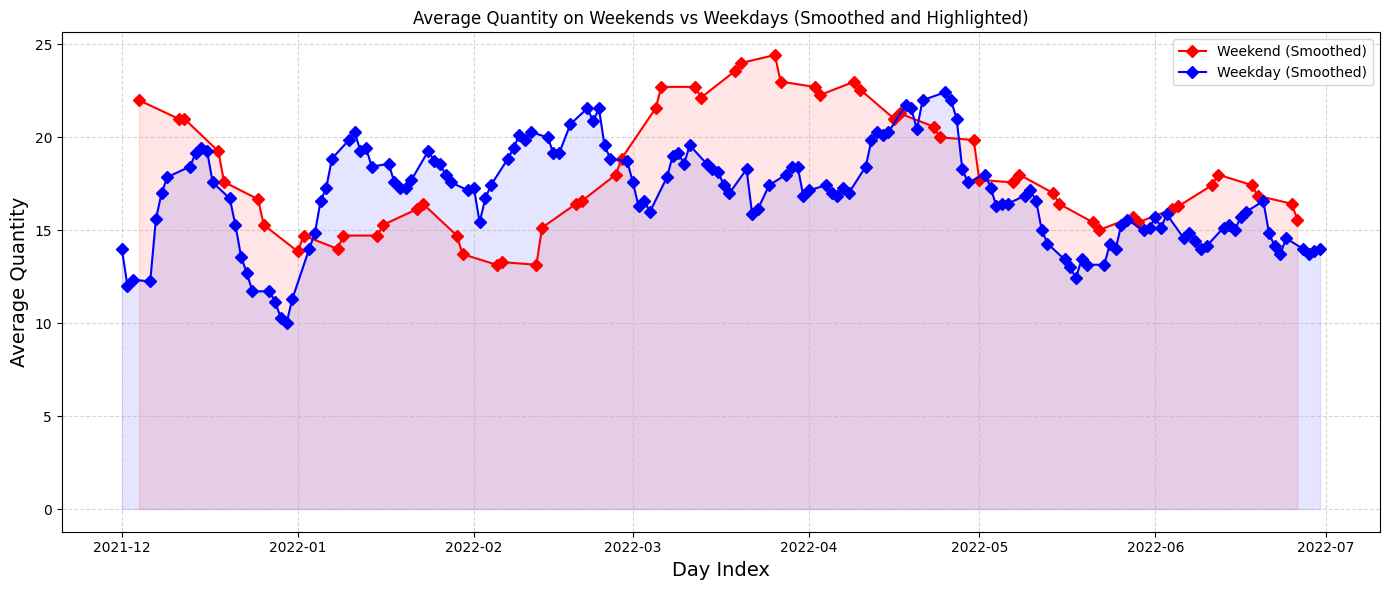

In [58]:
# Calculate weekend and weekday average quantities
weekend_data = df[df['is_weekend'] == 1].groupby('Day Index')['Quantity'].mean()
weekday_data = df[df['is_weekend'] == 0].groupby('Day Index')['Quantity'].mean()

weekend_smoothed = weekend_data.rolling(window=7, min_periods=1).mean() # window = 7 -> for 7 days of week
weekday_smoothed = weekday_data.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(14, 6))

# Plotting the smoothed weekend and weekday data with shaded areas for clarity
plt.plot(weekend_smoothed.index, weekend_smoothed.values, label='Weekend (Smoothed)', color='red', marker='D')
plt.plot(weekday_smoothed.index, weekday_smoothed.values, label='Weekday (Smoothed)', color='blue', marker='D')
plt.fill_between(weekend_smoothed.index, weekend_smoothed.values, color='red', alpha=0.1)
plt.fill_between(weekday_smoothed.index, weekday_smoothed.values, color='blue', alpha=0.1)

plt.title('Average Quantity on Weekends vs Weekdays (Smoothed and Highlighted)')
plt.xlabel('Day Index', fontsize=14)
plt.ylabel('Average Quantity', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In certain periods, like around March and April, the weekend and weekday averages diverge, with weekends having higher average quantities. This suggests potential seasonality or events affecting weekend activity more significantly than weekdays.

In [59]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

corr_matrix = numeric_columns.corr()
print(corr_matrix)

                 Quantity    Clicks  Impressions  log_quantity  log_clicks  \
Quantity         1.000000  0.374935     0.191357      0.979745    0.335871   
Clicks           0.374935  1.000000     0.038807      0.333916    0.980365   
Impressions      0.191357  0.038807     1.000000      0.202109    0.033529   
log_quantity     0.979745  0.333916     0.202109      1.000000    0.300065   
log_clicks       0.335871  0.980365     0.033529      0.300065    1.000000   
log_impressions  0.190056  0.016184     0.985583      0.200856    0.009986   
Day of Week     -0.013372  0.015678     0.027884     -0.022938    0.019121   
Quarter         -0.265235 -0.223875    -0.252880     -0.278271   -0.175269   
Year             0.196621 -0.095736     0.335144      0.218593   -0.165180   
Day of Month    -0.238449 -0.117320    -0.236272     -0.245868   -0.136572   
Week of Year    -0.271985 -0.249682    -0.277756     -0.288999   -0.206502   

                 log_impressions  Day of Week   Quarter      Ye

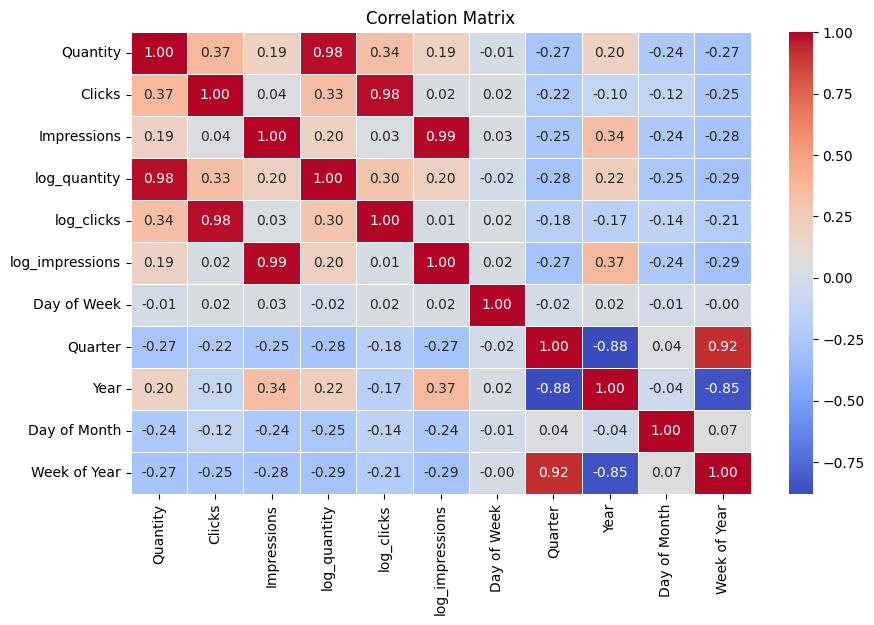

In [60]:
# Create the heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()